In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter



In [82]:
%matplotlib inline

In [73]:
plt.rcParams["figure.figsize"] = (10, 5)


In [74]:
saved_style_state = matplotlib.rcParams.copy()  

# booo

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [75]:
if os.path.isfile("bars-and-pubs-with-patron-capacity.csv"):
    filepath = "bars-and-pubs-with-patron-capacity.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")
pub_data = pd.read_csv(filepath,skiprows=1)
print("done")


loading from file
done


We can also get the list of columns out of the data frame

In [76]:
pub_data.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Number of patrons', 'Longitude', 'Latitude',
       'location'],
      dtype='object')

In [83]:
row_one = pub_data.iloc[1]
row_one


Census year                                           2002
Block ID                                                14
Property ID                                         103172
Base property ID                                    103172
Building address     31-39 Elizabeth Street MELBOURNE 3000
CLUE small area                            Melbourne (CBD)
Trading name                               Connells Tavern
Business address        35 Elizabeth Street MELBOURNE 3000
Number of patrons                                      350
Longitude                                       144.964322
Latitude                                        -37.817426
location              -37.81742610667125, 144.964321660097
Land Type                                       Commercial
Name: 1, dtype: object

In [84]:
area_counts = pub_data['CLUE small area'].value_counts()
print(area_counts)

CLUE small area
Melbourne (CBD)                 3198
Southbank                        415
Carlton                          293
North Melbourne                  287
Docklands                        213
Parkville                         69
West Melbourne (Residential)      66
East Melbourne                    43
Melbourne (Remainder)             42
Kensington                        42
South Yarra                       23
Port Melbourne                     5
Name: count, dtype: int64


In [85]:
area_type_mapping = {
    'Melbourne (CBD)': 'Commercial',
    'Carlton': 'Mixed',
    'Parkville': 'Residential',
    'North Melbourne': 'Mixed',
    'East Melbourne': 'Residential',
    'Southbank': 'Commercial',
    'Melbourne (Remainder)': 'Mixed',
    'South Yarra': 'Residential',
    'Docklands': 'Commercial',
    'West Melbourne (Residential)': 'Residential',
    'Kensington': 'Residential',
    'Port Melbourne': 'Industrial'
}
pub_data['Land Type'] = pub_data['CLUE small area'].map(area_type_mapping)
print(pub_data[['CLUE small area', 'Land Type']].head())


   CLUE small area   Land Type
0  Melbourne (CBD)  Commercial
1  Melbourne (CBD)  Commercial
2  Melbourne (CBD)  Commercial
3  Melbourne (CBD)  Commercial
4  Melbourne (CBD)  Commercial


In [89]:
merged_data = pd.merge(pub_data, area_type_mapping, on='CLUE small area')

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [81]:
merged_data.head()

NameError: name 'merged_data' is not defined

In [157]:
merged_data["CLUE small area"].value_counts()

CLUE small area
Melbourne (CBD)    3198
Carlton             293
North Melbourne     287
Parkville            69
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of patrons in different years and areas')

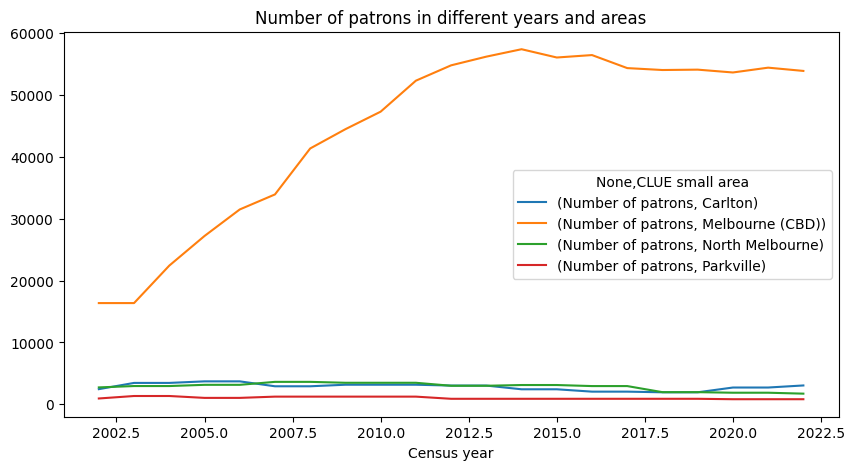

In [158]:
merged_data[["Census year", "CLUE small area", "Number of patrons"]].groupby(["Census year", "CLUE small area"]).sum().unstack().plot()
plt.title('Number of patrons in different years and areas')

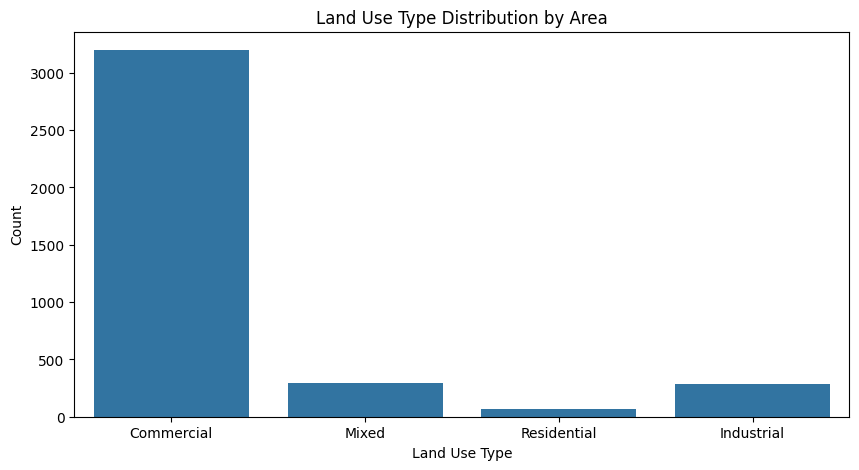

In [159]:
sns.countplot(x='Land use type', data=merged_data)
plt.title('Land Use Type Distribution by Area')
plt.xlabel('Land Use Type')
plt.ylabel('Count')
plt.show()

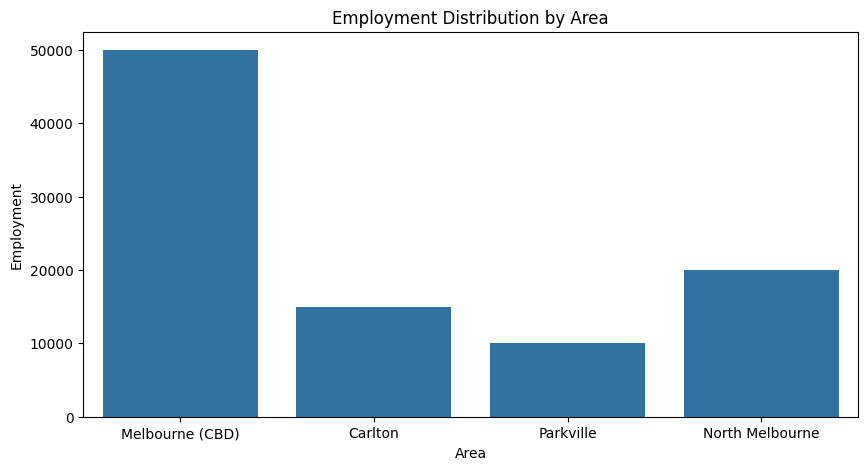

In [160]:
sns.barplot(x='CLUE small area', y='Employment', data=land_use_df)
plt.title('Employment Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Employment')
plt.show()

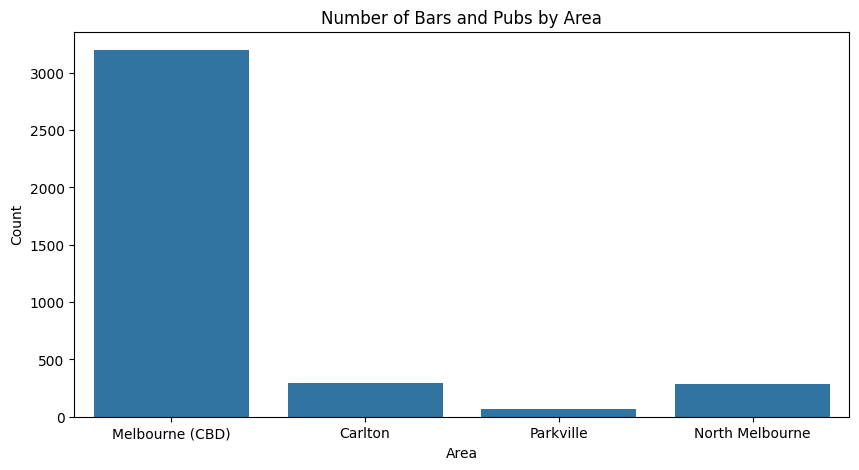

In [161]:
sns.countplot(x='CLUE small area', data=merged_data)
plt.title('Number of Bars and Pubs by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

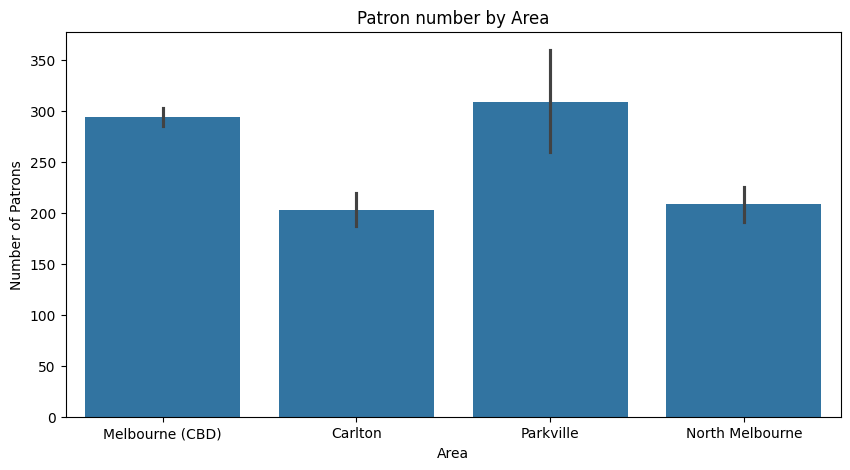

In [163]:
sns.barplot(x='CLUE small area', y='Number of patrons', data=merged_data)
plt.title('Patron number by Area')
plt.xlabel('Area')
plt.ylabel('Number of Patrons')
plt.show()

                   Employment  Number of patrons
Employment           1.000000           0.114647
Number of patrons    0.114647           1.000000


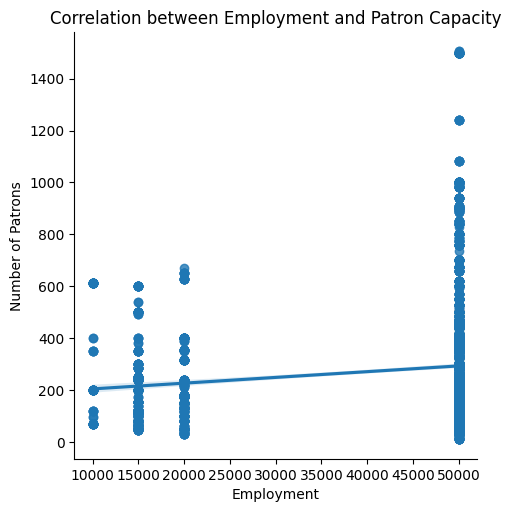

In [164]:
correlation = merged_data[['Employment', 'Number of patrons']].corr()
print(correlation)

sns.lmplot(x='Employment', y='Number of patrons', data=merged_data)
plt.title('Correlation between Employment and Patron Capacity')
plt.xlabel('Employment')
plt.ylabel('Number of Patrons')
plt.show()

In [51]:
shp_file_name = "/Users/stella/1161/star_data/my map/property-boundaries.shp"
zip_file_name = "boundaries.zip"
web_file_path = (
    "https://discover.data.vic.gov.au/dataset/"
)

filepath = "bars-and-pubs-with-patron-capacity.csv"

In [52]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [53]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [63]:
df = pd.read_csv("bars-and-pubs-with-patron-capacity.csv")


In [70]:
df['geometry'] = df.apply(Point(merged_data("location")), axis=1)

NameError: name 'merged_data' is not defined

In [66]:
mel_prop = gpd.read_file("my map/property-boundaries.shp")

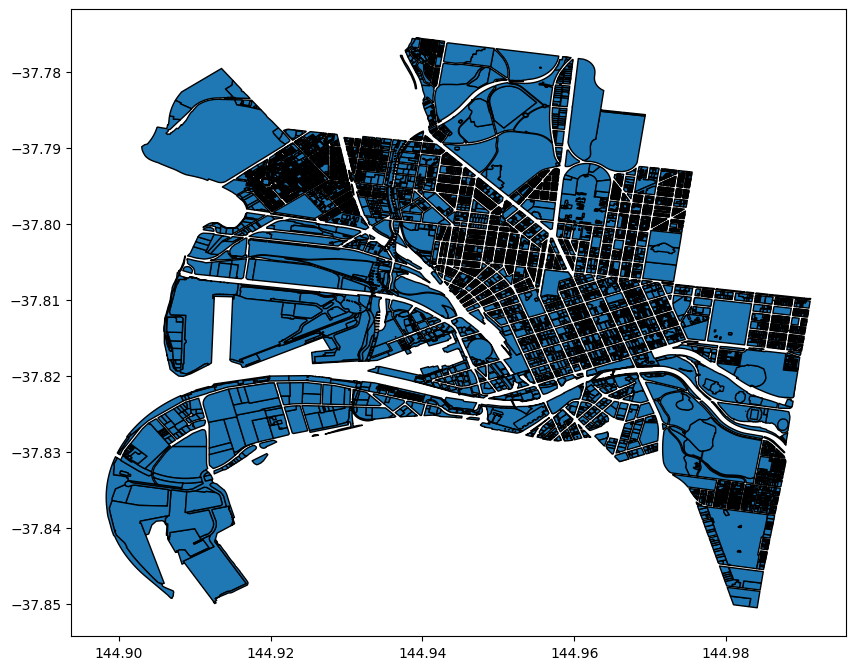

In [67]:
ax = mel_prop.plot(edgecolor='k', figsize=(10, 10))

In [68]:
gdf.plot(ax=ax, column='CLUE small area', cmap='Set1', legend=True, markersize=10)

NameError: name 'gdf' is not defined

<Axes: >

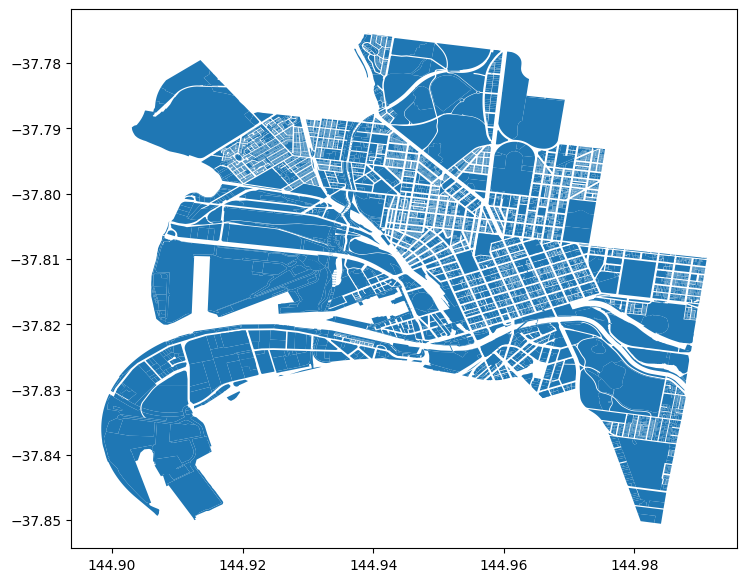

In [55]:
mel_prop.plot()

In [56]:
mel_muni = gpd.read_file("my map/municipal-boundary.shp")

<Axes: >

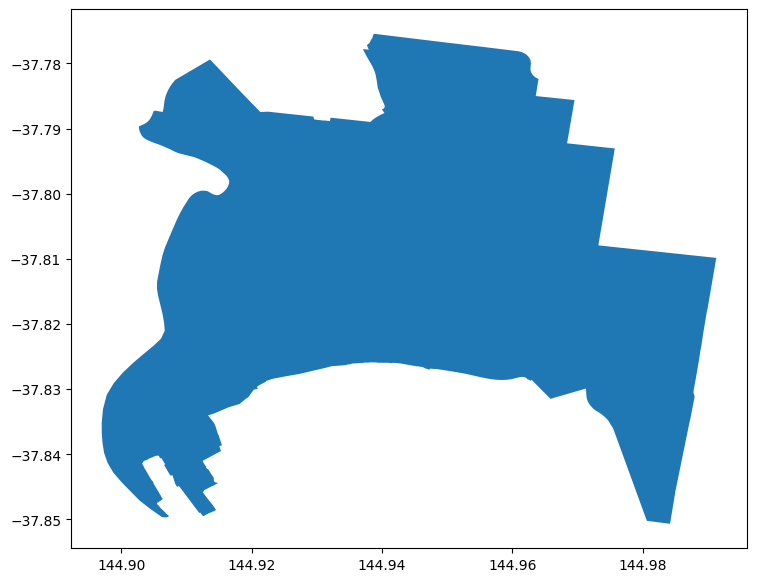

In [57]:
mel_muni.plot()

In [58]:
burbs = gpd.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(5)

,geometry
14218,"POLYGON ((144.950 -37.802, 144.950 -37.802, 14..."
5025,"POLYGON ((144.955 -37.794, 144.955 -37.794, 14..."
9579,"POLYGON ((144.925 -37.790, 144.925 -37.789, 14..."
4435,"POLYGON ((144.989 -37.810, 144.989 -37.810, 14..."
3837,"POLYGON ((144.950 -37.805, 144.950 -37.805, 14..."


In [59]:
cols_to_drop = ["VIC_LOCA_1", "VIC_LOCA_3", "VIC_LOCA_4","VIC_LOCA_5","VIC_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,geometry
0,"POLYGON ((144.941 -37.785, 144.942 -37.785, 14..."
1,"POLYGON ((144.941 -37.785, 144.942 -37.784, 14..."


In [60]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)

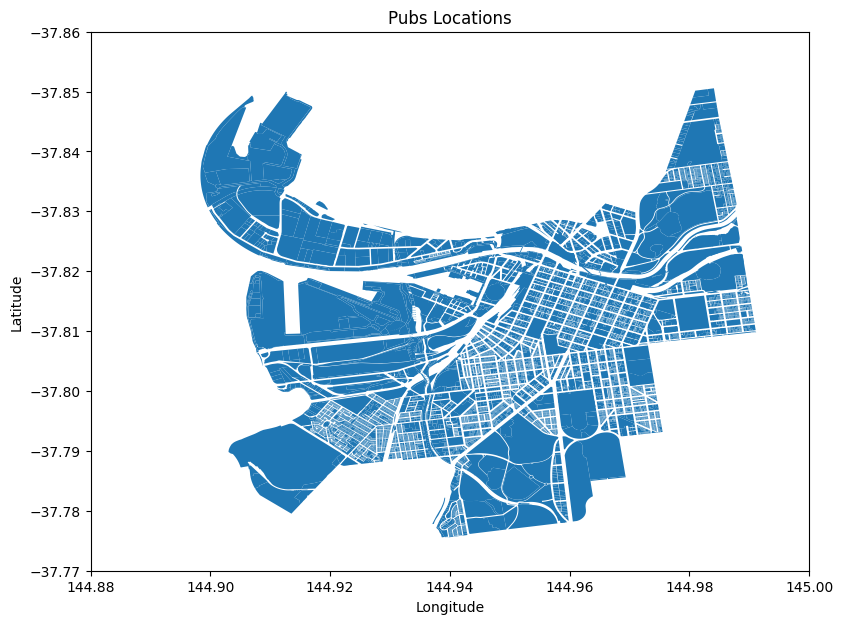

In [61]:
burbs.geometry.plot()
plt.title("Pubs Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([144.88, 145]) 
plt.ylim([-37.77, -37.86])    
plt.show()


In [ ]:
filepath = "star_data/my map/boundaries.zip"